# Chapter 8: Statistics: Modelling Data

## Linear fitting

The first example involves a simulated data set of finding the time for an object to drop a certain distance. We generated a fake data set of "drop times" that are normally distributed about their expected value with an 0.5s offset (which will show up as a systematic non zero value of the offset in the fit). 


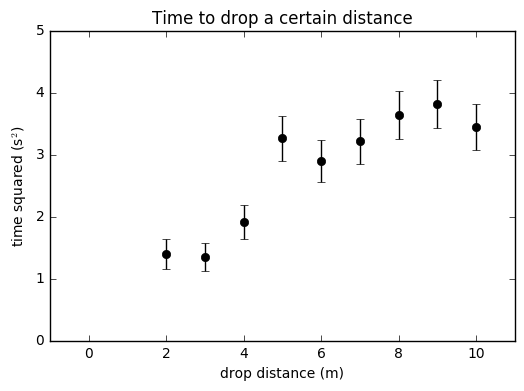

In [1]:
import numpy as np
from math import *
import pylab as pl
%matplotlib inline

#Drop distances:
xi=np.arange(1,11) 
#Random error in the time measurements
sigma_t=0.1
#Generate random times (note the 0.5 offset)
ti=np.random.normal(0.5+np.sqrt(xi*2.0/9.81),sigma_t)
#Square them:
ti2=ti*ti
#Get the error in the squared time
sigma_t2=2*ti*sigma_t

#Plot them:
pl.errorbar(xi[1:], ti2[1:], yerr=sigma_t2[1:],fmt='o',color='black')
pl.xlabel("drop distance (m)")
pl.ylabel("time squared (s$^2$)")
pl.title("Time to drop a certain distance")
pl.axis([-1,11,0,5])
pl.show()

Of course, everytime you run the above code, you get a different set of random data. We ran it once to get the data that we put in Table 8.1, so below we hard code reading the data from the table for example 8.1

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
[ 1.2  1.6  1.7  2.2  2.3  2.4  3.1  3.3  3.1  3.7]
[ 0.2  0.3  0.3  0.3  0.3  0.3  0.4  0.4  0.4  0.4]
Probability to get g 2.2 sigma or further from accepted value: 0.027


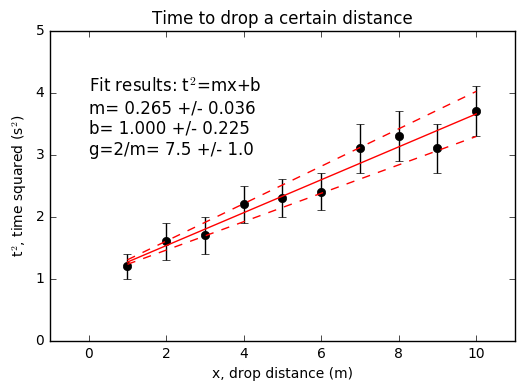

In [2]:
#Example 8.1
import numpy as np
from math import *
import pylab as pl
import scipy.stats as stats

#Copy and paste data from the table in the notes, add commas:
datalist=[
1.0, 1.1, 0.1, 1.2, 0.2,
2.0, 1.3, 0.1, 1.6, 0.3,
3.0, 1.3, 0.1, 1.7, 0.3,
4.0, 1.5, 0.1, 2.2, 0.3,
5.0, 1.5, 0.1, 2.3, 0.3,
6.0, 1.6, 0.1, 2.4, 0.3,
7.0, 1.8, 0.1, 3.1, 0.4,
8.0, 1.8, 0.1, 3.3, 0.4,
9.0, 1.8, 0.1, 3.1, 0.4,
10.0, 1.9, 0.1, 3.7, 0.4,
]
#convert this to a numpy array, and change the shape
data=np.array(datalist)
data=data.reshape(10,5) #changes the shape to get the data in the same format as table
#Get the colums out of the table:
x=data[:,0]#-5.5#This is the first column of data (x)
t2=data[:,3]#-2.46#The 4th column (t^2)
#sigma_t2=2*data[:,2]*data[:,1] #The 5th colum, sigma_t^2
sigma_t2=data[:,4] #The 5th colum, sigma_t^2
print(x)
print(t2)
print(sigma_t2)
#calculate the slope and offset
#start by calculating all of the sums
N=x.size
x2sum=(x*x).sum()
xt2sum=(x*t2).sum()
xsum=x.sum()
t2sum=t2.sum()

#We will use the mean value of the sigma_t2 as the "error in y"
denominator=N*x2sum-xsum**2
#slope:
m=(N*xt2sum-xsum*t2sum)/denominator
sigma_m=sigma_t2.mean()*sqrt(N/denominator)# using mean error in t^2
#offset:
b=(x2sum*t2sum-xsum*xt2sum)/denominator
sigma_b=sigma_t2.mean()*sqrt(x2sum/denominator)# using mean error in t^2

gmeas=2.0/m
sigma_g=2/m/m*sigma_m

#The fit results
text='''Fit results: t$^2$=mx+b
m= {:.3f} +/- {:.3f}
b= {:.3f} +/- {:.3f}
g=2/m= {:.1f} +/- {:.1f}'''.format(m,sigma_m,b,sigma_b,gmeas,sigma_g)

#calculate probability of obtaining a value this far away from the accepted value
dsigma=(9.81-gmeas)/sigma_g
prob=2.0*stats.norm.sf(dsigma)
print("Probability to get g {:.1f} sigma or further from accepted value: {:.3f}".format(dsigma,prob))

#plot:
#The data:
pl.errorbar(x,t2,yerr=sigma_t2,fmt='o',color='black')
#The fit:
pl.plot(x,m*x+b,color='red')
#The fit with m+/-sigma_c
pl.plot(x,(m+sigma_m)*x+b,'--',color='red')
pl.plot(x,(m-sigma_m)*x+b,'--',color='red')

pl.text(0,3,text,fontsize=12)#fit results onto the plot
pl.xlabel("x, drop distance (m)")
pl.ylabel("t$^2$, time squared (s$^2$)")
pl.title("Time to drop a certain distance")
pl.axis([-1,11,0,5])

pl.show()


## Residuals
We then plot the residuals:

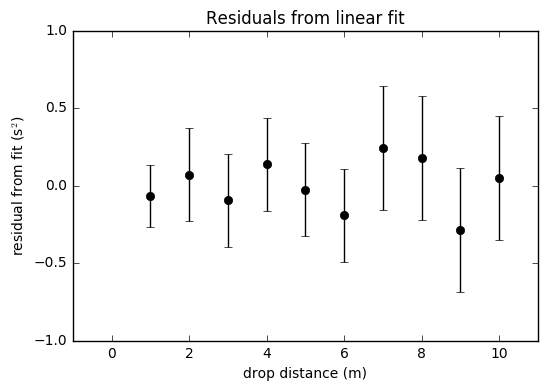

In [3]:
#Plot the residuals for the above plot:
#The residuals have the same error bars:
pl.errorbar(x,t2-(m*x+b),yerr=sigma_t2,fmt='o',color='black')
pl.xlabel("drop distance (m)")
pl.ylabel("residual from fit (s$^2$)")
pl.title("Residuals from linear fit")
pl.axis([-1,11,-1,1])
pl.show()

## Chi-squared as a function of the parameters
And then studied how the actual chi-squared changes as a function of the parameters (m and b) of the fit

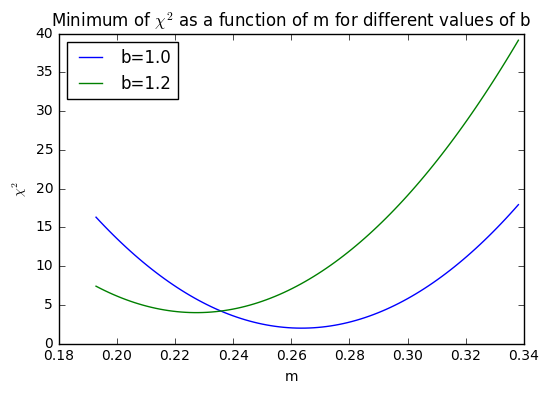

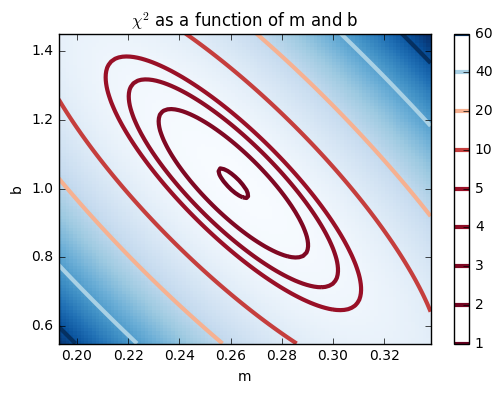

In [4]:
#Calculate the chi-squared for example 8.1

#A function to calculate chi-squared for a given set of data, errors on data, and model predictions
def chis(ydata,sigma_y,ymodel):
    return (((ydata-ymodel)/sigma_y)**2).sum()

ydata=t2
sigma_y=sigma_t2

#an array of values of b and m centered around the best fit value:
b_vals=np.linspace(b-2*sigma_b,b+2*sigma_b,100)
m_vals=np.linspace(m-2*sigma_m,m+2*sigma_m,100)
   
#Plot the chi-squared vs m, for 2 different values of b    
pl.plot(m_vals,[chis(ydata,sigma_y,m_vals[i]*x+b) for i in range(m_vals.size)],label="b={:.1f}".format(b))
pl.plot(m_vals,[chis(ydata,sigma_y,m_vals[i]*x+(b+sigma_b)) for i in range(m_vals.size)],label="b={:.1f}".format(b+sigma_b))
pl.legend(loc='best')
pl.xlabel('m')
pl.ylabel('$\chi^2$')
pl.title('Minimum of $\chi^2$ as a function of m for different values of b')
pl.show()

#Make a 2D plot of chi-squared vs m and b:
mm,bb=np.meshgrid(m_vals,b_vals)
chi2d=pl.zeros(mm.shape)
for i in range(m_vals.size):
    for j in range(b_vals.size):
        chi2d[i,j]=chis(ydata,sigma_y,m_vals[i]*x+b_vals[j])
pl.pcolormesh(mm,bb,chi2d,cmap='Blues',alpha=1)
pl.axis([m_vals.min(),m_vals.max(),b_vals.min(),b_vals.max()])
pl.contour(mm,bb,chi2d,levels=[1,2,3,4,5,10,20,40,60],cmap='RdBu',linewidths=3)
pl.xlabel('m')
pl.ylabel('b')
pl.title("$\chi^2$ as a function of m and b")
pl.colorbar()
pl.show()



## Non linear fitting
A non-linear model can be defined as a function that takes the dependent variable and a set of parameters as arguments. Below, we give an example of a model that is the sum of a scaled normalized gaussian and a sloped line. Such a model is frequent in particle physics where one searches for a gaussian peak in a spectrum in the presence of a background (the sloped line).

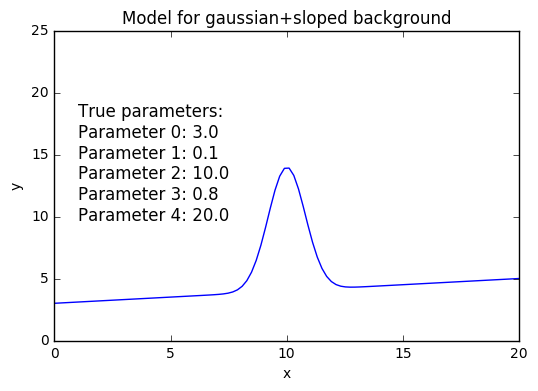

In [5]:
import numpy as np
from math import *
import pylab as pl
from math import *
%matplotlib inline

#Define a model for a gaussian + linear background, with 5 parameters:
def model(x, *pars):
    offset=pars[0]
    slope=pars[1]
    mu=pars[2] #mean
    sigma=pars[3] #sigma
    norm=pars[4] #normalization
    return offset+slope*x+norm*(1.0/sqrt(2.*pi*sigma**2)*np.exp(-((x-mu)**2)/2./sigma**2))

#Visualize the model

#Set some values for the true parameters
true_pars=[3.,0.1,10.,0.8,20.]

text="True parameters:\n"
for i in range(len(true_pars)):
    text = text + "Parameter {}: {}\n".format(i,true_pars[i]) 
                             
xi=np.linspace(0,20,100)
yi=model(xi,*true_pars)
pl.plot(xi,yi)
pl.xlabel('x')
pl.ylabel('y')
pl.title('Model for gaussian+sloped background')
pl.axis([0,20,0,25])
pl.text(1,8,text,fontsize=12)
pl.show()



We will now create some "fake data" from this model, and then fit those data to see if we recover the true value of the model parameters. Since the model is similar to a common situation in particle physics, we will place an uncertainty in each value of y equal to the square root of y. This would correspond to a data set such as a histogram, where one would count the number of events within a certain range of energies, and the uncertainty in that number of counts would thus be the square root.

In [6]:
#The x-values of the data
xdata=np.linspace(1,20,20)
#The "expected" y-values if there were no fluctuations
ydata=model(xdata,*true_pars)
#Assume Poisson fluctuations about the expected values
ydata=np.random.poisson(ydata)
ysigma=np.sqrt(ydata)




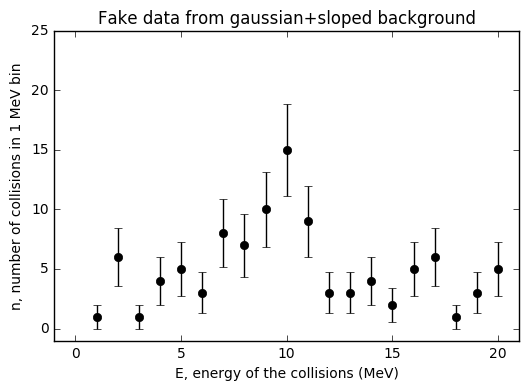

In [7]:
pl.errorbar(xdata,ydata,yerr=ysigma,fmt='o',color='black')
pl.xlabel('E, energy of the collisions (MeV)')
pl.ylabel('n, number of collisions in 1 MeV bin')
pl.title('Fake data from gaussian+sloped background')
pl.axis([-1,21,-1,25])
pl.show()

In [8]:
#print to a table for the notes:

#for i in range(xdata.size):
    #print("{:.1f} & {:.1f} & {:.1f}\\\\\n\hline".format(xdata[i],ydata[i],ysigma[i]))

    

Here we load the hard-coded data from the notes, so that we can fit them

In [13]:
import numpy as np
from math import *
import pylab as pl
from math import *
%matplotlib inline

#First, load the table data
data=np.array([1.0,4.0,2.0,
2.0,3.0,1.7,
3.0,2.0,1.4,
4.0,3.0,1.7,
5.0,5.0,2.2,
6.0,2.0,1.4,
7.0,4.0,2.0,
8.0,2.0,1.4,
9.0,10.0,3.2,
10.0,16.0,4.0,
11.0,12.0,3.5,
12.0,6.0,2.4,
13.0,3.0,1.7,
14.0,3.0,1.7,
15.0,3.0,1.7,
16.0,3.0,1.7,
17.0,5.0,2.2,
18.0,5.0,2.2,
19.0,2.0,1.4,
20.0,5.0,2.2])
#extract the data by column
data=data.reshape(20,3)
xdata=data[:,0]
ydata=data[:,1]
ysigma=data[:,2]

We can now use scipy optimize to fit these data. Depending on the model, the fitting algorithm may not converge unless it is given a reasonable starting guess for the parameters. In this case, we need to give a reasonable guess for the mean of the gaussian.

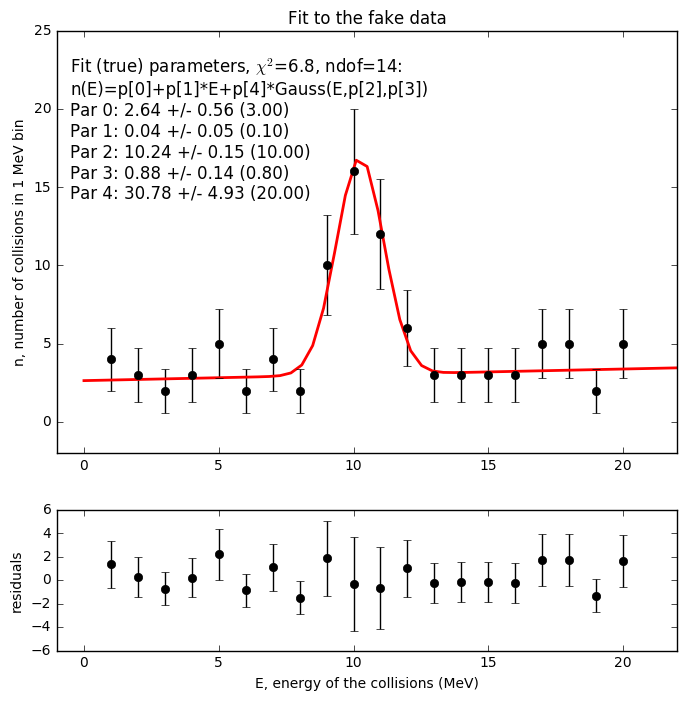

[[  3.1e-01  -2.2e-02   7.0e-03  -1.4e-02  -5.2e-01]
 [ -2.2e-02   2.2e-03  -5.8e-04   1.1e-04   1.9e-03]
 [  7.0e-03  -5.8e-04   2.4e-02   4.4e-04  -2.3e-02]
 [ -1.4e-02   1.1e-04   4.4e-04   1.9e-02   2.6e-01]
 [ -5.2e-01   1.9e-03  -2.3e-02   2.6e-01   2.4e+01]]


In [14]:
from scipy.optimize import curve_fit 
import matplotlib.gridspec as gridspec  # for unequal plot boxes

#Try a guess for our parameters
#The fit does not converge if we give a crazy guess for the mean
guess_pars=[1,1,12,1,1]

#Run the fit to the data:
fit_pars, fit_cov = curve_fit(model,xdata,ydata,sigma=ysigma,p0=guess_pars)

#Get the parameter errors out of the covariance matrix:
fit_err = np.sqrt(np.diag(fit_cov))

#Calculate value of y from the model using the fit parameters:    
yfit=model(xdata,*fit_pars)   

#Calculate the residuals:
yres=ydata-model(xdata,*fit_pars)

#Calculate the chi-squared between data and the fit
chisq=(((ydata-yfit)/ysigma)**2).sum()
ndof=ydata.size-fit_pars.size-1

#These are the "true" parameters used to make the data (for comparison)
true_pars=[3.,0.1,10.,0.8,20.]

#Put the results into some text:
textfit="Fit (true) parameters, $\chi^2$={:.1f}, ndof={}:\n".format(chisq,ndof)
textfit=textfit+"n(E)=p[0]+p[1]*E+p[4]*Gauss(E,p[2],p[3])\n"
for i in range(len(true_pars)):
    textfit = textfit + "Par {}: {:.2f} +/- {:.2f} ({:.2f})\n".format(i,fit_pars[i],fit_err[i],true_pars[i])
    

#Plot the fit and the residuals
pl.figure(figsize=(8,8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
pl.subplot(gs[0])
pl.plot(xi,model(xi,*fit_pars) ,lw=2,color='red')
pl.errorbar(xdata,ydata,yerr=ysigma,fmt='o',color='black')#data
pl.ylabel('n, number of collisions in 1 MeV bin')
pl.title('Fit to the fake data')
pl.text(-0.5,13,textfit,fontsize=12)
pl.axis([-1,22,-2,25])

pl.subplot(gs[1])
pl.errorbar(xdata,yres,yerr=ysigma,fmt='o',color='black')#residuals
pl.ylabel('residuals')
pl.xlabel('E, energy of the collisions (MeV)')
pl.axis([-1,22,-6,6])

pl.show()

np.set_printoptions(precision=1)
print(fit_cov)




## Same fit using QExpy
The QExpy package (if installed) uses the above code internally to conduct non-linear fits. This can be done easily, simply by specifying the model:

-----------------Fit results-------------------
Fit of  dataset4  to  custom
Fit parameters:
dataset4_custom_fit0_fitpars_par0 = 2.64 +/- 0.56,
dataset4_custom_fit0_fitpars_par1 = 0.037 +/- 0.046,
dataset4_custom_fit0_fitpars_par2 = 10.24 +/- 0.15,
dataset4_custom_fit0_fitpars_par3 = 0.88 +/- 0.14,
dataset4_custom_fit0_fitpars_par4 = 30.8 +/- 4.9

Correlation matrix: 
[[ 1.    -0.842  0.081 -0.181 -0.187]
 [-0.842  1.    -0.08   0.018  0.008]
 [ 0.081 -0.08   1.     0.021 -0.03 ]
 [-0.181  0.018  0.021  1.     0.379]
 [-0.187  0.008 -0.03   0.379  1.   ]]

chi2/ndof = 6.84/14
---------------End fit results----------------



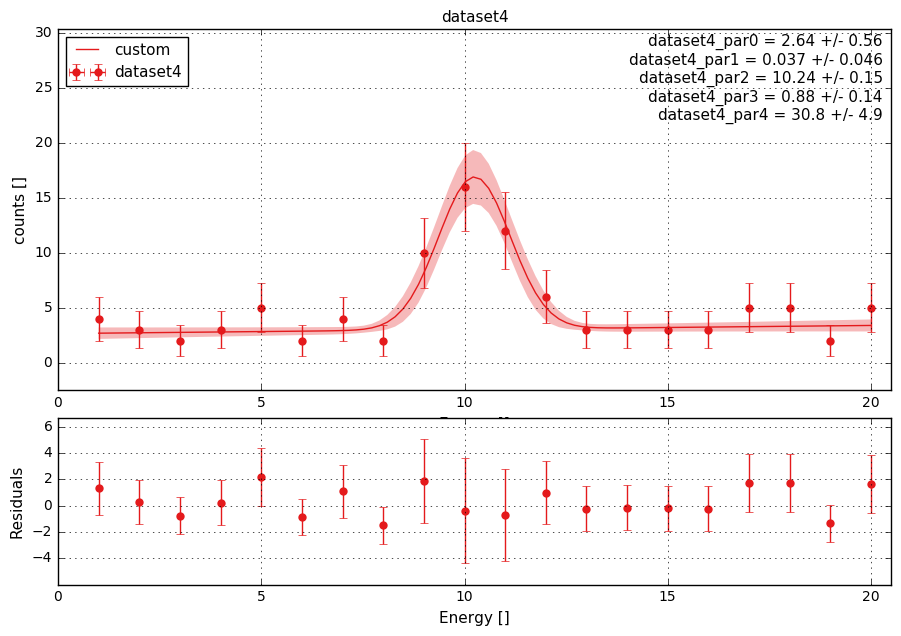

In [21]:
import qexpy as q
#Load the data into a plot
fig = q.MakePlot(xdata=xdata,ydata=ydata,yerr=ysigma,xname="Energy",yname="counts")
q.set_sigfigs_error(2)
q.plot_engine='mpl'
#Define a model for a gaussian + linear background, with 5 parameters:
#note the difference, that we have to use np.sqrt()
def model(x, *pars):
    offset=pars[0]
    slope=pars[1]
    mu=pars[2] #mean
    sigma=pars[3] #sigma
    norm=pars[4] #normalization
    return offset+slope*x+norm*(1.0/np.sqrt(2.*pi*sigma**2)*np.exp(-((x-mu)**2)/2./sigma**2))

#Define a guess for the parameters
guess_pars=[1,1,12,1,1]

#perform the fit
fig.fit(model=model,parguess=guess_pars)

#add residuals
fig.add_residuals()

#show:
fig.show()

## Goodnes of fit and the chi-squared
Plot the chi-square distribution

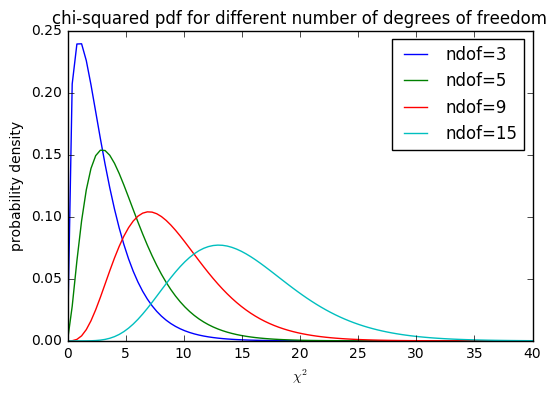

In [11]:
import scipy.stats as stats

xi=np.linspace(0,40,100)

pl.plot(xi,stats.chi2.pdf(xi,3), label="ndof=3")
pl.plot(xi,stats.chi2.pdf(xi,5), label="ndof=5")
pl.plot(xi,stats.chi2.pdf(xi,9), label="ndof=9")
pl.plot(xi,stats.chi2.pdf(xi,15), label="ndof=15")

pl.xlabel('$\chi^2$')
pl.ylabel('probability density')
pl.title('chi-squared pdf for different number of degrees of freedom')
pl.legend(loc='best')
pl.show()

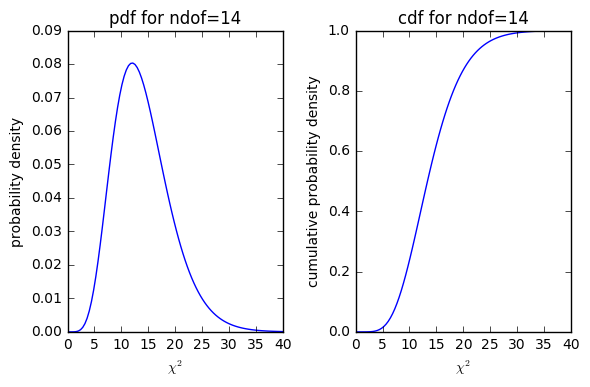

Prob of obtaining 6.8 or less is 0.06
Prob of obtaining 6.8 or more is 0.94


In [12]:
#Plot this chi-squared pdf and cdf for ndof=14

ax1=pl.subplot(121)
pl.plot(xi,stats.chi2.pdf(xi,14))
pl.xlabel('$\chi^2$')
pl.ylabel('probability density')
pl.title('pdf for ndof=14')
ax1=pl.subplot(122)
pl.plot(xi,stats.chi2.cdf(xi,14))
pl.xlabel('$\chi^2$')
pl.ylabel('cumulative probability density')
pl.title('cdf for ndof=14')
pl.tight_layout()
pl.show()

print("Prob of obtaining 6.8 or less is {:.2f}".format(stats.chi2.cdf(6.8,14)))
print("Prob of obtaining 6.8 or more is {:.2f}".format(stats.chi2.sf(6.8,14)))
